In [26]:
import numpy as np
from utils import *
import torch
%load_ext autoreload
%autoreload 2

import torchvision
import torch
from torchvision import transforms

train_dataset = torchvision.datasets.CIFAR10(
    root= './data', train = True,
    download =True, transform = None)
test_dataset  = torchvision.datasets.CIFAR10(
    root= './data', train = False,
    download =True, transform = None)
torch.manual_seed(1789)
test_dataset, pirate_dataset = torch.utils.data.random_split(test_dataset, [0.5, 0.5])

chenyaofo_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])


key = np.hstack([np.random.randint(0,256, size=(100,3)), np.random.randint(0,32, size=(100,2))])
key

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Files already downloaded and verified
Files already downloaded and verified


array([[ 17,  70, 123,  20,  12],
       [173, 193, 203,   4,   0],
       [154,  62, 122,  20,   4],
       [239, 125, 170,  11,   8],
       [179, 183, 156,   0,  10],
       [154, 118,   2,  25,  13],
       [135, 191,  31,  20,  24],
       [ 19, 105,  29,   5,  28],
       [152, 144,  67,   5,   6],
       [ 39,  12, 102,   3,  22],
       [172,  83, 166,   4,  11],
       [186,  64, 166,   8,  15],
       [127, 212, 121,  15,  10],
       [ 26, 218, 233,  21,   6],
       [213,  15,  86,  12,  15],
       [243, 249, 148,  13,  28],
       [ 51, 218, 232,  13,  25],
       [ 74, 185,   5,   6,  14],
       [ 53,  71, 159,   9,  18],
       [118, 170,  70,  10,  23],
       [ 91, 186, 125,   1,  13],
       [180, 115, 248,   6,   0],
       [138, 225,  12,  19,   3],
       [232, 197,  76,   4,   3],
       [ 77, 235,  72,   7,  23],
       [104,  24, 223,  29,  27],
       [194,  71, 116,  30,   9],
       [ 19, 254,  37,   8,  21],
       [194, 243,  64,  12,  23],
       [ 41,  

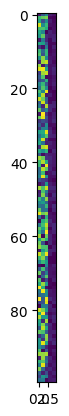

In [27]:
import matplotlib.pyplot as plt

plt.imshow(key)

In [28]:
mh = ModelHandler.download_model(
    "chenyaofo/pytorch-cifar-models", 'cifar10_resnet20',
    dataset = train_dataset,
    pirate_set = pirate_dataset,
    testset = test_dataset,
    transform = chenyaofo_transform,
    # device = 'cpu'
)

def watermarking_function(img):
    return watermarked_key(img, key)

finetune_model, finetune_performance = mh.finetune(watermarking_function, 2)
finetune_performance

Using cache found in C:\Users\tanma/.cache\torch\hub\chenyaofo_pytorch-cifar-models_master
100%|██████████| 2/2 [02:56<00:00, 88.47s/it]


(0.9216294000442772, 0.9997786141244188, 0.006198804516271862)

In [29]:
fidelity, effectiveness, fpr = finetune_performance
finetune_performance

(0.9216294000442772, 0.9997786141244188, 0.006198804516271862)

In [31]:
attacked_model, attacked_performance = mh.finetune_attack(finetune_model, watermarking_function, epoches=1)
attacked_performance

100%|██████████| 1/1 [00:01<00:00,  1.10s/it]


(0.8109364622537082, 0.2406464467566969, 0.13283152534868276)